<a href="https://colab.research.google.com/github/EmilEdvardsson/10oct-22apr/blob/main/Copy_of_PickleSimulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
#!pip install catboost
#from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score, explained_variance_score
import scipy.integrate as it
import seaborn as sns; sns.set_theme(color_codes=True)
import joblib
import pickle
import statistics as st

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Georgealhoush/Hello-World/main/Final_dataset_time.csv')
df_min = pd.read_csv('https://raw.githubusercontent.com/Georgealhoush/Hello-World/main/Minutes_Final_dataset_time.csv')

In [ ]:
full_drop_list = ['Unnamed: 0', 'Date', 'Month', 'Day',
             'I20K+', 'I30K+', 'I40K+', 'I50K+', 'I60K+', 'I70K+',
             'I80K+', 'I90K+', 'I100K+',

             '6I20K+', '6I30K+', '6I40K+', '6I50K+', '6I60K+', '6I70K+',
             '6I80K+', '6I90K+', '6I100K+',
             '7I20K+', '7I30K+', '7I40K+', '7I50K+', '7I60K+', '7I70K+',
             '7I80K+', '7I90K+', '7I100K+',
             '8I20K+', '8I30K+', '8I40K+', '8I50K+', '8I60K+', '8I70K+',
             '8I80K+', '8I90K+', '8I100K+',
             '9I20K+', '9I30K+', '9I40K+', '9I50K+', '9I60K+', '9I70K+',
             '9I80K+', '9I90K+', '9I100K+',
             '10I20K+', '10I30K+', '10I40K+', '10I50K+', '10I60K+', '10I70K+',
             '10I80K+', '10I90K+', '10I100K+',
             '11I20K+', '11I30K+', '11I40K+', '11I50K+', '11I60K+', '11I70K+',
             '11I80K+', '11I90K+', '11I100K+',
             '12I20K+', '12I30K+', '12I40K+', '12I50K+', '12I60K+', '12I70K+',
             '12I80K+', '12I90K+', '12I100K+',
             '13I20K+', '13I30K+', '13I40K+', '13I50K+', '13I60K+', '13I70K+',
             '13I80K+', '13I90K+', '13I100K+',
             '14I20K+', '14I30K+', '14I40K+', '14I50K+', '14I60K+', '14I70K+',
             '14I80K+', '14I90K+', '14I100K+',
             '15I20K+', '15I30K+', '15I40K+', '15I50K+', '15I60K+', '15I70K+',
             '15I80K+', '15I90K+', '15I100K+',

             'Integrated Power',
             '15 Integrated Power', '14 Integrated Power',
             '13 Integrated Power', '12 Integrated Power', '11 Integrated Power',
             '10 Integrated Power', '9 Integrated Power', '8 Integrated Power',
             '7 Integrated Power', '6 Integrated Power',

             'O14 Integrated Power', 'O13 Integrated Power', 'O12 Integrated Power',
             'O11 Integrated Power', 'O10 Integrated Power', 'O9 Integrated Power',
             'O8 Integrated Power', 'O7 Integrated Power',

             'O7I20K+', 'O7I30K+', 'O7I40K+', 'O7I50K+', 'O7I60K+', 'O7I70K+',
             'O7I80K+', 'O7I90K+', 'O7I100K+',
             'O8I20K+', 'O8I30K+', 'O8I40K+', 'O8I50K+', 'O8I60K+', 'O8I70K+',
             'O8I80K+', 'O8I90K+', 'O8I100K+',
             'O9I20K+', 'O9I30K+', 'O9I40K+', 'O9I50K+', 'O9I60K+', 'O9I70K+',
             'O9I80K+', 'O9I90K+', 'O9I100K+',
             'O10I20K+', 'O10I30K+', 'O10I40K+', 'O10I50K+', 'O10I60K+', 'O10I70K+',
             'O10I80K+', 'O10I90K+', 'O10I100K+',
             'O11I20K+', 'O11I30K+', 'O11I40K+', 'O11I50K+', 'O11I60K+', 'O11I70K+',
             'O11I80K+', 'O11I90K+', 'O11I100K+',
             'O12I20K+', 'O12I30K+', 'O12I40K+', 'O12I50K+', 'O12I60K+', 'O12I70K+',
             'O12I80K+', 'O12I90K+', 'O12I100K+',
             'O13I20K+', 'O13I30K+', 'O13I40K+', 'O13I50K+', 'O13I60K+', 'O13I70K+',
             'O13I80K+', 'O13I90K+', 'O13I100K+',
             'O14I20K+', 'O14I30K+', 'O14I40K+', 'O14I50K+', 'O14I60K+', 'O14I70K+',
             'O14I80K+', 'O14I90K+', 'O14I100K+',

             'U14 Integrated Power', 'U13 Integrated Power', 'U12 Integrated Power',
             'U11 Integrated Power', 'U10 Integrated Power', 'U9 Integrated Power',
             'U8 Integrated Power', 'U7 Integrated Power',

             'U7I20K+', 'U7I30K+', 'U7I40K+', 'U7I50K+', 'U7I60K+', 'U7I70K+',
             'U7I80K+', 'U7I90K+', 'U7I100K+',
             'U8I20K+', 'U8I30K+', 'U8I40K+', 'U8I50K+', 'U8I60K+', 'U8I70K+',
             'U8I80K+', 'U8I90K+', 'U8I100K+',
             'U9I20K+', 'U9I30K+', 'U9I40K+', 'U9I50K+', 'U9I60K+', 'U9I70K+',
             'U9I80K+', 'U9I90K+', 'U9I100K+',
             'U10I20K+', 'U10I30K+', 'U10I40K+', 'U10I50K+', 'U10I60K+', 'U10I70K+',
             'U10I80K+', 'U10I90K+', 'U10I100K+',
             'U11I20K+', 'U11I30K+', 'U11I40K+', 'U11I50K+', 'U11I60K+', 'U11I70K+',
             'U11I80K+', 'U11I90K+', 'U11I100K+',
             'U12I20K+', 'U12I30K+', 'U12I40K+', 'U12I50K+', 'U12I60K+', 'U12I70K+',
             'U12I80K+', 'U12I90K+', 'U12I100K+',
             'U13I20K+', 'U13I30K+', 'U13I40K+', 'U13I50K+', 'U13I60K+', 'U13I70K+',
             'U13I80K+', 'U13I90K+', 'U13I100K+',
             'U14I20K+', 'U14I30K+', 'U14I40K+', 'U14I50K+', 'U14I60K+', 'U14I70K+',
             'U14I80K+', 'U14I90K+', 'U14I100K+']

In [ ]:
def set_features(CH, border, school, time=1):
  #CH = 8
  #border = '50'
  #school = 'Central'
  ## time 1 for yes 0 for no
  #time = 1

  ###################################


  always_deleted = ['Unnamed: 0', 'Date', 'Month', 'Day',
              'I20K+', 'I30K+', 'I40K+', 'I50K+', 'I60K+', 'I70K+',
              'I80K+', 'I90K+', 'I100K+','O14 Integrated Power', 'O13 Integrated Power', 'O12 Integrated Power',
              'O11 Integrated Power', 'O10 Integrated Power', 'O9 Integrated Power',
              'O8 Integrated Power', 'O7 Integrated Power','15I20K+', '15I30K+', '15I40K+', '15I50K+', '15I60K+', '15I70K+',
              '15I80K+', '15I90K+', '15I100K+','Integrated Power','O7I20K+', 'O7I30K+', 'O7I40K+', 'O7I50K+', 'O7I60K+', 'O7I70K+',
              'O7I80K+', 'O7I90K+', 'O7I100K+',
              'O8I20K+', 'O8I30K+', 'O8I40K+', 'O8I50K+', 'O8I60K+', 'O8I70K+',
              'O8I80K+', 'O8I90K+', 'O8I100K+',
              'O9I20K+', 'O9I30K+', 'O9I40K+', 'O9I50K+', 'O9I60K+', 'O9I70K+',
              'O9I80K+', 'O9I90K+', 'O9I100K+',
              'O10I20K+', 'O10I30K+', 'O10I40K+', 'O10I50K+', 'O10I60K+', 'O10I70K+',
              'O10I80K+', 'O10I90K+', 'O10I100K+',
              'O11I20K+', 'O11I30K+', 'O11I40K+', 'O11I50K+', 'O11I60K+', 'O11I70K+',
              'O11I80K+', 'O11I90K+', 'O11I100K+',
              'O12I20K+', 'O12I30K+', 'O12I40K+', 'O12I50K+', 'O12I60K+', 'O12I70K+',
              'O12I80K+', 'O12I90K+', 'O12I100K+',
              'O13I20K+', 'O13I30K+', 'O13I40K+', 'O13I50K+', 'O13I60K+', 'O13I70K+',
              'O13I80K+', 'O13I90K+', 'O13I100K+',
              'O14I20K+', 'O14I30K+', 'O14I40K+', 'O14I50K+', 'O14I60K+', 'O14I70K+',
              'O14I80K+', 'O14I90K+', 'O14I100K+','TI20K+', 'TI30K+', 'TI40K+',
              'TI50K+', 'TI60K+', 'TI70K+', 'TI80K+', 'TI90K+', 'TI100K+',
              'TO7I20K+', 'TO8I20K+', 'TO9I20K+', 'TO10I20K+', 'TO11I20K+',
              'TO12I20K+', 'TO13I20K+', 'TO14I20K+', 'TO7I30K+', 'TO8I30K+',
              'TO9I30K+', 'TO10I30K+', 'TO11I30K+', 'TO12I30K+', 'TO13I30K+',
              'TO14I30K+', 'TO7I40K+', 'TO8I40K+', 'TO9I40K+', 'TO10I40K+',
              'TO11I40K+', 'TO12I40K+', 'TO13I40K+', 'TO14I40K+', 'TO7I50K+',
              'TO8I50K+', 'TO9I50K+', 'TO10I50K+', 'TO11I50K+', 'TO12I50K+',
              'TO13I50K+', 'TO14I50K+', 'TO7I60K+', 'TO8I60K+', 'TO9I60K+',
              'TO10I60K+', 'TO11I60K+', 'TO12I60K+', 'TO13I60K+', 'TO14I60K+',
              'TO7I70K+', 'TO8I70K+', 'TO9I70K+', 'TO10I70K+', 'TO11I70K+',
              'TO12I70K+', 'TO13I70K+', 'TO14I70K+', 'TO7I80K+', 'TO8I80K+',
              'TO9I80K+', 'TO10I80K+', 'TO11I80K+', 'TO12I80K+', 'TO13I80K+',
              'TO14I80K+', 'TO7I90K+', 'TO8I90K+', 'TO9I90K+', 'TO10I90K+',
              'TO11I90K+', 'TO12I90K+', 'TO13I90K+', 'TO14I90K+', 'TO7I100K+',
              'TO8I100K+', 'TO9I100K+', 'TO10I100K+', 'TO11I100K+', 'TO12I100K+',
              'TO13I100K+', 'TO14I100K+']

  always_in = ['Central', 'Domar', 'Tiunda', 'Ärentuna', 'Stenhagen', 'NUGGETS', 'SÅS',
        'KÖTT', 'RIS', 'GRYTA', 'BURGARE', 'BRÖD', 'POTATIS', 'PASTA', 'BIFF',
        'KORV', 'SOPPA', 'RÖRA', 'BOLLAR', 'SYLT', 'ÄRTOR', 'NUDLAR', 'PYTT',
        'GRATÄNG', 'KYCKLING', 'LINSER', 'FISK', 'RÖDBETOR', 'ZUCCINITZATSIKI',
        'PALSTERNACKSCRISP', 'LASAGNE', 'VEGOFÄRS', 'BÖNGULASCH',
        'LINSBOLOGNESE', 'MOROTSTZATZIKI', 'MATVETE', 'BULGUR',
        'RASKNINGSLUNCH', 'KÖKETS', 'GRÖNA', 'VAL', 'ROTFRUKTSFRESTELSE',
        'ÄGGHALVA', 'UGNSBAKADE', 'ZUCCHINIPLÄTTAR', 'TZATZIKI', 'RAGGMUNK',
        'LINGON', 'ÄPPELCHUTNEY', 'GRÅÄRTA', 'LINGONSKY', 'FALAFEL',
        'PURJOTOPPING', 'SVAMP', 'ENBÄR', 'MOROT', 'STROGANOFF',
        'FÄRSKOSTKLICK', 'GÄSTENS', 'TIMJAN', 'KESO', 'GRÖNSAKER', 'NOGREEN',
        'HET', 'PUMPA', 'COLESLAW', 'DAAL', 'FÄRSKOST', 'ROSTADE', 'ROTSAKER',
        'KARDEMUMMAKAKA', 'ÄPPELKOMPOTT', 'RISGRYNSGRÖT', 'OST', 'APELSIN',
        'STUVAD', 'GRÖNKÅL', 'RÖDKÅLSCOLESLAW', 'TAPSI', 'MATVETESCHNITZEL',
        'UGNSROSTAD', 'SOJABÖNOR', 'VEGILI', 'SPENAT', 'BLOMKÅLSPURÉ', 'SMÖR',
        'KETCHUP', 'GURKMAJONNÄS', 'MAJS', 'TORTILLA', 'BLOMKÅL', 'KORMA',
        'STUVADE', 'HUMMUS', 'INGEFÄRA', 'CURRYDRESSING', 'STING', 'MATHAVRE', 'NACHOS', 'QUORN', 'BÖNWRAP',
        'TACOSMAK', 'ZUCCHINI', 'SEJFILÉ', 'MOROTSTÄCKE', 'DILL', 'PANNKAKA',
        'NÖTFÄRS', 'AIOLI', 'FÄRSPANNA', 'HÖNSFÄRS', 'TOMAT', 'PANERAD',
        'ROTFRUKTER', 'BROCCOLI', 'QUINOA', 'UGNSPANNKAKA', 'ÄPPELFRÄS',
        'MATKORN', 'LIMECRÈME', 'ROTSELLERI', 'BLODPUDDING', 'VÅRRULLE',
        'LÄTTPANERAD', 'BASILIKATÄCKE', 'MARINERAD', 'OMELETT', 'SVAMPSTUVNING',
        'UGNSSTEKT', 'RÄKOR', 'JULSKINKA', 'RÖDBETSSALLAD', 'JANSSONS',
        'FRESTELSE', 'PULLED', 'PORK', 'SALSA', 'MANGO', 'MANNAGRYNSPUDDING',
        'KOKOSPANERAD', 'FRISKUSREMOULAD', 'RÖKT', 'ÄGG', 'FISH', 'CHIPS',
        'REMOULAD', 'BÖNOR', 'ÄGGSMÖRGÅS', 'LAX', 'MOROTSBULLAR',
        'MYNTAYOGHURT', 'NOEXTRA', 'FLÄSK', 'KÅLPUDDING', 'PAELLA', 'PESTO',
        'ROTFRUKTSCHIPS', 'SILLTALLRIK', 'RÖDKÅLSSALLAD', 'CHICKEN', 'FAJITA',
        'OSTCRÈME', 'SKAGEN', 'NASI', 'GORENG', 'RISOTTO', 'MOUSSAKA',
        'INDISKA', 'OLIVER', 'SALLADSOST', 'LINSFÄRSLIMPA']

  full_drop_list = ['Unnamed: 0', 'Date', 'Month', 'Day',
              'I20K+', 'I30K+', 'I40K+', 'I50K+', 'I60K+', 'I70K+',
              'I80K+', 'I90K+', 'I100K+',

              '6I20K+', '6I30K+', '6I40K+', '6I50K+', '6I60K+', '6I70K+',
              '6I80K+', '6I90K+', '6I100K+',
              '7I20K+', '7I30K+', '7I40K+', '7I50K+', '7I60K+', '7I70K+',
              '7I80K+', '7I90K+', '7I100K+',
              '8I20K+', '8I30K+', '8I40K+', '8I50K+', '8I60K+', '8I70K+',
              '8I80K+', '8I90K+', '8I100K+',
              '9I20K+', '9I30K+', '9I40K+', '9I50K+', '9I60K+', '9I70K+',
              '9I80K+', '9I90K+', '9I100K+',
              '10I20K+', '10I30K+', '10I40K+', '10I50K+', '10I60K+', '10I70K+',
              '10I80K+', '10I90K+', '10I100K+',
              '11I20K+', '11I30K+', '11I40K+', '11I50K+', '11I60K+', '11I70K+',
              '11I80K+', '11I90K+', '11I100K+',
              '12I20K+', '12I30K+', '12I40K+', '12I50K+', '12I60K+', '12I70K+',
              '12I80K+', '12I90K+', '12I100K+',
              '13I20K+', '13I30K+', '13I40K+', '13I50K+', '13I60K+', '13I70K+',
              '13I80K+', '13I90K+', '13I100K+',
              '14I20K+', '14I30K+', '14I40K+', '14I50K+', '14I60K+', '14I70K+',
              '14I80K+', '14I90K+', '14I100K+',
              '15I20K+', '15I30K+', '15I40K+', '15I50K+', '15I60K+', '15I70K+',
              '15I80K+', '15I90K+', '15I100K+',

              'Integrated Power',
              '15 Integrated Power', '14 Integrated Power',
              '13 Integrated Power', '12 Integrated Power', '11 Integrated Power',
              '10 Integrated Power', '9 Integrated Power', '8 Integrated Power',
              '7 Integrated Power', '6 Integrated Power',

              'O14 Integrated Power', 'O13 Integrated Power', 'O12 Integrated Power',
              'O11 Integrated Power', 'O10 Integrated Power', 'O9 Integrated Power',
              'O8 Integrated Power', 'O7 Integrated Power',

              'O7I20K+', 'O7I30K+', 'O7I40K+', 'O7I50K+', 'O7I60K+', 'O7I70K+',
              'O7I80K+', 'O7I90K+', 'O7I100K+',
              'O8I20K+', 'O8I30K+', 'O8I40K+', 'O8I50K+', 'O8I60K+', 'O8I70K+',
              'O8I80K+', 'O8I90K+', 'O8I100K+',
              'O9I20K+', 'O9I30K+', 'O9I40K+', 'O9I50K+', 'O9I60K+', 'O9I70K+',
              'O9I80K+', 'O9I90K+', 'O9I100K+',
              'O10I20K+', 'O10I30K+', 'O10I40K+', 'O10I50K+', 'O10I60K+', 'O10I70K+',
              'O10I80K+', 'O10I90K+', 'O10I100K+',
              'O11I20K+', 'O11I30K+', 'O11I40K+', 'O11I50K+', 'O11I60K+', 'O11I70K+',
              'O11I80K+', 'O11I90K+', 'O11I100K+',
              'O12I20K+', 'O12I30K+', 'O12I40K+', 'O12I50K+', 'O12I60K+', 'O12I70K+',
              'O12I80K+', 'O12I90K+', 'O12I100K+',
              'O13I20K+', 'O13I30K+', 'O13I40K+', 'O13I50K+', 'O13I60K+', 'O13I70K+',
              'O13I80K+', 'O13I90K+', 'O13I100K+',
              'O14I20K+', 'O14I30K+', 'O14I40K+', 'O14I50K+', 'O14I60K+', 'O14I70K+',
              'O14I80K+', 'O14I90K+', 'O14I100K+',

              'U14 Integrated Power', 'U13 Integrated Power', 'U12 Integrated Power',
              'U11 Integrated Power', 'U10 Integrated Power', 'U9 Integrated Power',
              'U8 Integrated Power', 'U7 Integrated Power',

              'U7I20K+', 'U7I30K+', 'U7I40K+', 'U7I50K+', 'U7I60K+', 'U7I70K+',
              'U7I80K+', 'U7I90K+', 'U7I100K+',
              'U8I20K+', 'U8I30K+', 'U8I40K+', 'U8I50K+', 'U8I60K+', 'U8I70K+',
              'U8I80K+', 'U8I90K+', 'U8I100K+',
              'U9I20K+', 'U9I30K+', 'U9I40K+', 'U9I50K+', 'U9I60K+', 'U9I70K+',
              'U9I80K+', 'U9I90K+', 'U9I100K+',
              'U10I20K+', 'U10I30K+', 'U10I40K+', 'U10I50K+', 'U10I60K+', 'U10I70K+',
              'U10I80K+', 'U10I90K+', 'U10I100K+',
              'U11I20K+', 'U11I30K+', 'U11I40K+', 'U11I50K+', 'U11I60K+', 'U11I70K+',
              'U11I80K+', 'U11I90K+', 'U11I100K+',
              'U12I20K+', 'U12I30K+', 'U12I40K+', 'U12I50K+', 'U12I60K+', 'U12I70K+',
              'U12I80K+', 'U12I90K+', 'U12I100K+',
              'U13I20K+', 'U13I30K+', 'U13I40K+', 'U13I50K+', 'U13I60K+', 'U13I70K+',
              'U13I80K+', 'U13I90K+', 'U13I100K+',
              'U14I20K+', 'U14I30K+', 'U14I40K+', 'U14I50K+', 'U14I60K+', 'U14I70K+',
              'U14I80K+', 'U14I90K+', 'U14I100K+',
              '15I20K+',
              '15I30K+',
              '15I40K+',
              '15I50K+',
              '15I60K+',
              '15I70K+',
              '15I80K+',
              '15I90K+',
              '15I100K+',
              '15 Integrated Power',
              'TI20K+',
              'T6I20K+',
              'T7I20K+',
              'T8I20K+',
              'T9I20K+',
              'T10I20K+',
              'T11I20K+',
              'T12I20K+',
              'T13I20K+',
              'T14I20K+',
              'T15I20K+',
              'TI30K+',
              'T6I30K+',
              'T7I30K+',
              'T8I30K+',
              'T9I30K+',
              'T10I30K+',
              'T11I30K+',
              'T12I30K+',
              'T13I30K+',
              'T14I30K+',
              'T15I30K+',
              'TI40K+',
              'T6I40K+',
              'T7I40K+',
              'T8I40K+',
              'T9I40K+',
              'T10I40K+',
              'T11I40K+',
              'T12I40K+',
              'T13I40K+',
              'T14I40K+',
              'T15I40K+',
              'TI50K+',
              'T6I50K+',
              'T7I50K+',
              'T8I50K+',
              'T9I50K+',
              'T10I50K+',
              'T11I50K+',
              'T12I50K+',
              'T13I50K+',
              'T14I50K+',
              'T15I50K+',
              'TI60K+',
              'T6I60K+',
              'T7I60K+',
              'T8I60K+',
              'T9I60K+',
              'T10I60K+',
              'T11I60K+',
              'T12I60K+',
              'T13I60K+',
              'T14I60K+',
              'T15I60K+',
              'TI70K+',
              'T6I70K+',
              'T7I70K+',
              'T8I70K+',
              'T9I70K+',
              'T10I70K+',
              'T11I70K+',
              'T12I70K+',
              'T13I70K+',
              'T14I70K+',
              'T15I70K+',
              'TI80K+',
              'T6I80K+',
              'T7I80K+',
              'T8I80K+',
              'T9I80K+',
              'T10I80K+',
              'T11I80K+',
              'T12I80K+',
              'T13I80K+',
              'T14I80K+',
              'T15I80K+',
              'TI90K+',
              'T6I90K+',
              'T7I90K+',
              'T8I90K+',
              'T9I90K+',
              'T10I90K+',
              'T11I90K+',
              'T12I90K+',
              'T13I90K+',
              'T14I90K+',
              'T15I90K+',
              'TI100K+',
              'T6I100K+',
              'T7I100K+',
              'T8I100K+',
              'T9I100K+',
              'T10I100K+',
              'T11I100K+',
              'T12I100K+',
              'T13I100K+',
              'T14I100K+',
              'T15I100K+',
              'TO7I20K+',
              'TO8I20K+',
              'TO9I20K+',
              'TO10I20K+',
              'TO11I20K+',
              'TO12I20K+',
              'TO13I20K+',
              'TO14I20K+',
              'TO7I30K+',
              'TO8I30K+',
              'TO9I30K+',
              'TO10I30K+',
              'TO11I30K+',
              'TO12I30K+',
              'TO13I30K+',
              'TO14I30K+',
              'TO7I40K+',
              'TO8I40K+',
              'TO9I40K+',
              'TO10I40K+',
              'TO11I40K+',
              'TO12I40K+',
              'TO13I40K+',
              'TO14I40K+',
              'TO7I50K+',
              'TO8I50K+',
              'TO9I50K+',
              'TO10I50K+',
              'TO11I50K+',
              'TO12I50K+',
              'TO13I50K+',
              'TO14I50K+',
              'TO7I60K+',
              'TO8I60K+',
              'TO9I60K+',
              'TO10I60K+',
              'TO11I60K+',
              'TO12I60K+',
              'TO13I60K+',
              'TO14I60K+',
              'TO7I70K+',
              'TO8I70K+',
              'TO9I70K+',
              'TO10I70K+',
              'TO11I70K+',
              'TO12I70K+',
              'TO13I70K+',
              'TO14I70K+',
              'TO7I80K+',
              'TO8I80K+',
              'TO9I80K+',
              'TO10I80K+',
              'TO11I80K+',
              'TO12I80K+',
              'TO13I80K+',
              'TO14I80K+',
              'TO7I90K+',
              'TO8I90K+',
              'TO9I90K+',
              'TO10I90K+',
              'TO11I90K+',
              'TO12I90K+',
              'TO13I90K+',
              'TO14I90K+',
              'TO7I100K+',
              'TO8I100K+',
              'TO9I100K+',
              'TO10I100K+',
              'TO11I100K+',
              'TO12I100K+',
              'TO13I100K+',
              'TO14I100K+',
              'TU7I20K+',
              'TU8I20K+',
              'TU9I20K+',
              'TU10I20K+',
              'TU11I20K+',
              'TU12I20K+',
              'TU13I20K+',
              'TU14I20K+',
              'TU7I30K+',
              'TU8I30K+',
              'TU9I30K+',
              'TU10I30K+',
              'TU11I30K+',
              'TU12I30K+',
              'TU13I30K+',
              'TU14I30K+',
              'TU7I40K+',
              'TU8I40K+',
              'TU9I40K+',
              'TU10I40K+',
              'TU11I40K+',
              'TU12I40K+',
              'TU13I40K+',
              'TU14I40K+',
              'TU7I50K+',
              'TU8I50K+',
              'TU9I50K+',
              'TU10I50K+',
              'TU11I50K+',
              'TU12I50K+',
              'TU13I50K+',
              'TU14I50K+',
              'TU7I60K+',
              'TU8I60K+',
              'TU9I60K+',
              'TU10I60K+',
              'TU11I60K+',
              'TU12I60K+',
              'TU13I60K+',
              'TU14I60K+',
              'TU7I70K+',
              'TU8I70K+',
              'TU9I70K+',
              'TU10I70K+',
              'TU11I70K+',
              'TU12I70K+',
              'TU13I70K+',
              'TU14I70K+',
              'TU7I80K+',
              'TU8I80K+',
              'TU9I80K+',
              'TU10I80K+',
              'TU11I80K+',
              'TU12I80K+',
              'TU13I80K+',
              'TU14I80K+',
              'TU7I90K+',
              'TU8I90K+',
              'TU9I90K+',
              'TU10I90K+',
              'TU11I90K+',
              'TU12I90K+',
              'TU13I90K+',
              'TU14I90K+',
              'TU7I100K+',
              'TU8I100K+',
              'TU9I100K+',
              'TU10I100K+',
              'TU11I100K+',
              'TU12I100K+',
              'TU13I100K+',
              'TU14I100K+'
              ]

  borders = ['20','30','40','50','60','70','80','90','100']
  X_features = []

  ##START OF DAY##
  if time == 0:
    if CH == 6:
      X = df[always_in]
      y = df['I' + border + 'K+']
    elif CH == 15:
      bad_list = [col for col in df.columns if '15' in col]
      X_features = [ele for ele in df.columns if ele not in bad_list]
      for element in always_deleted:
            if element in X_features:
                X_features.remove(element)
      X_features = [i for i in X_features if i not in always_in]
      X = df[always_in + X_features]
      y = df['15I' + border + 'K+']
    else:
    ##REST OF DAY##
      for i in range(6,CH):
        X_features = X_features + [col for col in df.columns if str(i) + 'I' in col]
        X_features = X_features + [col for col in df.columns if str(i) + ' Int' in col]
      

        y_target = 'O' + str(CH) + 'I' + str(border) + 'K+'
        for element in always_deleted:
            if element in X_features:
                X_features.remove(element)

        X_features = [i for i in X_features if i not in always_in]
        X = df[X_features + always_in]
        y = df[y_target]
  else:
    ##START OF DAY##
    if CH == 6:
      X = df[always_in]
      y = df['TI' + border + 'K+']*5
      
    elif CH == 15:
      bad_list = [col for col in df.columns if '15' in col]
      X_features = [ele for ele in df.columns if ele not in bad_list]
      for element in always_deleted:
            if element in X_features:
                X_features.remove(element)
      X_features = [i for i in X_features if i not in always_in]
      X = df[always_in + X_features]
      y = df['T15I' + border + 'K+']*5
    else:
    ##REST OF DAY##
      for i in range(6,CH):
        X_features = X_features + [col for col in df.columns if str(i) + 'I' in col]
        X_features = X_features + [col for col in df.columns if str(i) + ' Int' in col]
      

        y_target = 'TO' + str(CH) + 'I' + str(border) + 'K+'
        for element in always_deleted:
            if element in X_features:
                X_features.remove(element)
        filter = [i for i in X_features if i in always_in]
        X_features = [i for i in X_features if i not in always_in]
        X = df[X_features + always_in]
        y = df[y_target]*5
  if school == 'Central':
    X = X[X['Central'] == 1]
    y = y.iloc[X[X['Central'] == 1].index]
  elif school == 'Domar':
    X = X[X['Domar'] == 1]
    y = y.iloc[X[X['Domar'] == 1].index]
  elif school == 'Ärentuna':
    X = X[X['Ärentuna'] == 1]
    y = y.iloc[X[X['Ärentuna'] == 1].index]
  elif school == 'Stenhagen':
    X = X[X['Stenhagen'] == 1]
    y = y.iloc[X[X['Stenhagen'] == 1].index]
  return X,y

In [ ]:
def HyperParameterTuningGB(school):
  min_samples_split = range(2, 9)
  min_samples_leaf = range(1, 7)
  loss = ['absolute_error', 'huber']
  randomgrid = {'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'loss': loss}
  model = GradientBoostingRegressor()
  rf_model = GridSearchCV(model, randomgrid, cv=5)
  borders = ['20','30', '40', '50', '60', '70', '80', '90', '100']
  time = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  resultsGB = {}
  for i in time:
    for j in borders:
      X= set_features(i, j, school)
      rf_model.fit(X[0], X[1])
      resultsGB['TO' + str(i) + 'I' + str(j) + 'K+'] = rf_model.best_params_
  return resultsGB

In [ ]:
def HyperParameterTuningRF(school):
  min_samples_split = range(2, 9)
  min_samples_leaf = range(1, 7)
  randomgrid = {'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
  model = RandomForestRegressor()
  rf_model = GridSearchCV(model, randomgrid, cv=5)
  borders = ['20','30', '40', '50', '60', '70', '80', '90', '100']
  time = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
  resultsRF = {}
  modelsRF={}
  for i in time:
    for j in borders:
      X= set_features(i, j, school, 1)
      rf_model.fit(X[0], X[1])
      resultsRF['TO' + str(i) + 'I' + str(j) + 'K+'] = rf_model.best_params_
      model = RandomForestRegressor(min_samples_leaf=rf_model.best_params_['min_samples_leaf'], min_samples_split=rf_model.best_params_['min_samples_split'])
      modelsRF['TO' + str(i) + 'I' + str(j) + 'K+'] = model
  return resultsRF, modelsRF

In [ ]:
def simulate_battery(school,day,runtime_minutes,overrun_limit,wattage,time_left, time_left_13, time,file):

  import warnings
  warnings.filterwarnings("ignore")

  #school = 'Ärentuna'
  #day = 77
  #runtime_minutes = 120
  #overrun_limit = 20
  #wattage = 20000
  #time = 1
  full_runtime = runtime_minutes
  always_in = ['Central', 'Domar', 'Tiunda', 'Ärentuna', 'Stenhagen', 'NUGGETS', 'SÅS',
        'KÖTT', 'RIS', 'GRYTA', 'BURGARE', 'BRÖD', 'POTATIS', 'PASTA', 'BIFF',
        'KORV', 'SOPPA', 'RÖRA', 'BOLLAR', 'SYLT', 'ÄRTOR', 'NUDLAR', 'PYTT',
        'GRATÄNG', 'KYCKLING', 'LINSER', 'FISK', 'RÖDBETOR', 'ZUCCINITZATSIKI',
        'PALSTERNACKSCRISP', 'LASAGNE', 'VEGOFÄRS', 'BÖNGULASCH',
        'LINSBOLOGNESE', 'MOROTSTZATZIKI', 'MATVETE', 'BULGUR',
        'RASKNINGSLUNCH', 'KÖKETS', 'GRÖNA', 'VAL', 'ROTFRUKTSFRESTELSE',
        'ÄGGHALVA', 'UGNSBAKADE', 'ZUCCHINIPLÄTTAR', 'TZATZIKI', 'RAGGMUNK',
        'LINGON', 'ÄPPELCHUTNEY', 'GRÅÄRTA', 'LINGONSKY', 'FALAFEL',
        'PURJOTOPPING', 'SVAMP', 'ENBÄR', 'MOROT', 'STROGANOFF',
        'FÄRSKOSTKLICK', 'GÄSTENS', 'TIMJAN', 'KESO', 'GRÖNSAKER', 'NOGREEN',
        'HET', 'PUMPA', 'COLESLAW', 'DAAL', 'FÄRSKOST', 'ROSTADE', 'ROTSAKER',
        'KARDEMUMMAKAKA', 'ÄPPELKOMPOTT', 'RISGRYNSGRÖT', 'OST', 'APELSIN',
        'STUVAD', 'GRÖNKÅL', 'RÖDKÅLSCOLESLAW', 'TAPSI', 'MATVETESCHNITZEL',
        'UGNSROSTAD', 'SOJABÖNOR', 'VEGILI', 'SPENAT', 'BLOMKÅLSPURÉ', 'SMÖR',
        'KETCHUP', 'GURKMAJONNÄS', 'MAJS', 'TORTILLA', 'BLOMKÅL', 'KORMA',
        'STUVADE', 'HUMMUS', 'INGEFÄRA', 'CURRYDRESSING', 'STING', 'MATHAVRE', 'NACHOS', 'QUORN', 'BÖNWRAP',
        'TACOSMAK', 'ZUCCHINI', 'SEJFILÉ', 'MOROTSTÄCKE', 'DILL', 'PANNKAKA',
        'NÖTFÄRS', 'AIOLI', 'FÄRSPANNA', 'HÖNSFÄRS', 'TOMAT', 'PANERAD',
        'ROTFRUKTER', 'BROCCOLI', 'QUINOA', 'UGNSPANNKAKA', 'ÄPPELFRÄS',
        'MATKORN', 'LIMECRÈME', 'ROTSELLERI', 'BLODPUDDING', 'VÅRRULLE',
        'LÄTTPANERAD', 'BASILIKATÄCKE', 'MARINERAD', 'OMELETT', 'SVAMPSTUVNING',
        'UGNSSTEKT', 'RÄKOR', 'JULSKINKA', 'RÖDBETSSALLAD', 'JANSSONS',
        'FRESTELSE', 'PULLED', 'PORK', 'SALSA', 'MANGO', 'MANNAGRYNSPUDDING',
        'KOKOSPANERAD', 'FRISKUSREMOULAD', 'RÖKT', 'ÄGG', 'FISH', 'CHIPS',
        'REMOULAD', 'BÖNOR', 'ÄGGSMÖRGÅS', 'LAX', 'MOROTSBULLAR',
        'MYNTAYOGHURT', 'NOEXTRA', 'FLÄSK', 'KÅLPUDDING', 'PAELLA', 'PESTO',
        'ROTFRUKTSCHIPS', 'SILLTALLRIK', 'RÖDKÅLSSALLAD', 'CHICKEN', 'FAJITA',
        'OSTCRÈME', 'SKAGEN', 'NASI', 'GORENG', 'RISOTTO', 'MOUSSAKA',
        'INDISKA', 'OLIVER', 'SALLADSOST', 'LINSFÄRSLIMPA']

  y_targets = ['TI20K+','TI30K+','TI40K+','TI50K+','TI60K+','TI70K+','TI80K+','TI90K+','TI100K+']
  limits = ['20','30','40','50','60','70','80','90','100']
  model_dict = {}
  limit_lines = []
  testlist = [20000,30000,40000,50000,60000,70000,80000,90000,100000]
  X_train = df[df[school] == 1].drop([day-1+min(df[df[school] == 1].index)], axis=0)[always_in]



  for i in y_targets:
    y_train = df[df[school] == 1].drop([day-1+min(df[df[school] == 1].index)], axis=0)[i]
    model = GradientBoostingRegressor()
    model.fit(X_train,y_train)

    X_test = df[df[school] == 1].iloc[day-1][always_in].to_numpy().reshape(1,-1)
    y_test = df[df[school] == 1].iloc[day-1]

    prediction = model.predict(X_test)
    model_dict[i] = float(prediction*5)




  predictions = list(model_dict.values())
  if bool([i for i in predictions if i < runtime_minutes]):
    under = max([i for i in predictions if i < runtime_minutes])
  else:
    under = 999
  if bool([i for i in predictions if i > runtime_minutes]):
    over = min([i for i in predictions if i > runtime_minutes])
  else:
    over = 999

  if abs(over-runtime_minutes) < abs(under-runtime_minutes):
    if over-runtime_minutes < 10:
      model_name = [k for k, v in model_dict.items() if v == over]
      if len(model_name) > 1:
        model_name = model_name[0]
    else:
      model_name = [k for k, v in model_dict.items() if v == under]
      if len(model_name) > 1:
        model_name = model_name[0]
  else:
    model_name = [k for k, v in model_dict.items() if v == under]
    if len(model_name) > 1:
        model_name = model_name[0]
  if model_name[0] == 'T6I20K+':
    pass
  else:
    model_name = ['T6I30K+']
  model_list = []
  model_list.append(model_name)
  filter_test = [i for i in testlist if str(i)[:2] in model_list[0][0]]
  limit_lines.append(filter_test[0])
  ##CHECK HOUR 7##
  check_list = [7,8,9,10,11,12,13,14,15]
  for j in check_list:
    #print(model_list[j-7][0])
    runtime_minutes = runtime_minutes - df[df[school] == 1]['T'+ str(j-1) + 'I' + model_list[j-7][0].split(sep = 'I')[1]].iloc[day-1]*5

    y_targets = ['TO' + str(j) + 'I' + limits[i] + 'K+' for i in range(len(limits))]
    if j == 15:
      y_targets = ['T' + str(j) + 'I' + limits[i] + 'K+' for i in range(len(limits))]
    model_dict = {}
    #X_train = df[:511][always_in]
    for i in range(len(y_targets)):
      data = set_features(j,limits[i],school,time)
      X_train = data[0].drop([day-1+min(df[df[school] == 1].index)], axis=0)
      X_test = data[0].iloc[day-1].to_numpy().reshape(1,-1)
      y_train = data[1].drop([day-1+min(df[df[school] == 1].index)], axis=0)
      y_test = data[1].iloc[day-1]

      #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
      model = file[school][y_targets[i]]
      model.fit(X_train,y_train)

      #X_test = df.iloc[511][always_in].to_numpy().reshape(1,-1)

      prediction = model.predict(X_test)
      model_dict[y_targets[i]] = float(prediction*5)




    predictions = list(model_dict.values())
    if bool([k for k in predictions if k <= runtime_minutes]):
      under = max([k for k in predictions if k <= runtime_minutes])
    else:
      under = 999
    if bool([k for k in predictions if k > runtime_minutes]):
      over = min([k for k in predictions if k > runtime_minutes])
    else:
      over = 999
    if abs(over-runtime_minutes) < abs(under-runtime_minutes):
      if over-runtime_minutes < overrun_limit or under == 999:

        model_name = [k for k, v in model_dict.items() if v == over]
        if len(model_name) > 1:
          model_name = [model_name[0]]
      else:
        model_name = [k for k, v in model_dict.items() if v == under]
        if len(model_name) > 1:
          model_name = [model_name[0]]
    else:
      model_name = [k for k, v in model_dict.items() if v == under]

    ########## TEST TUNE ALGORITHM #############

    morning = ['O7','O8','O9']

    if 'O'+str(j) in morning:
      if '100' in model_name[0]:
        model_name[0] = 'TO' + str(j) + 'I90K+'
      elif '20' not in model_name[0]:
        model_name[0] = 'TO' + str(j) + 'I' + str(int(model_name[0].split(sep='I')[1][0])-1) + '0K+'
      else:
        model_name[0] = 'TO' + str(j) + 'I' + '20K+'

    if j in [11,12]:
      if runtime_minutes >= time_left:
        print('Reducing for hour: ' + str(j))
        if '100' in model_name[0]:
          model_name[0] = 'TO' + str(j) + 'I90K+'
        elif '20' not in model_name[0]:
          model_name[0] = 'TO' + str(j) + 'I' + str(int(model_name[0].split(sep='I')[1][0])-1) + '0K+'
        else:
          model_name[0] = 'TO' + str(j) + 'I' + '20K+'

    if j in [13]:
      if runtime_minutes >= time_left_13:
        if model_name[0] == 'TO13I20K+':
          pass
        else:
          model_name[0] = 'TO13I20K+'

    model_list.append(model_name)
    filter_test.append([i for i in testlist if str(i)[:2] in str(model_list[j-6])])
    limit_lines.append(filter_test[j-6][0])


  ##SIMULATE WATTAGE REDUCTION##

  reduced_day = []
  runtime_minutes = runtime_minutes - df[df[school] == 1]['T15I' + model_list[j-7][0].split(sep = 'I')[1]].iloc[day-1]*5
  for i in range(10):
    df_reduced = df_min[(df_min['Month'] == df[df['Central'] == 1].iloc[day-1]['Month']) & (df_min['Day'] == df[df['Central'] == 1].iloc[day-1]['Day']) & (df_min[school] == 1)]['Power'].reset_index(drop=True)[i*12:(i+1)*12].copy()
    index = list(df_reduced[df_reduced > limit_lines[i]].index)
    df_reduced[index] = df_reduced[index] - wattage
    reduced_day = reduced_day + list(df_reduced)




  ##PLOT RESULTS##

  plt.figure(figsize=(15, 7))
  for i in range(10):
    plt.hlines(y=limit_lines[i], xmin=12*i, xmax=12*(i+1), color='red', zorder=1)
  plt.plot(df_min[(df_min['Month'] == df[df['Central'] == 1].iloc[day-1]['Month']) & (df_min['Day'] == df[df['Central'] == 1].iloc[day-1]['Day']) & (df_min[school] == 1)]['Power'].reset_index(drop=True))
  #plt.plot(reduced_day,'r--')
  x = np.arange(0,120,1)
  #plt.fill_between(x,df_min[(df_min['Month'] == df[df['Central'] == 1].iloc[day-1]['Month']) & (df_min['Day'] == df[df['Central'] == 1].iloc[day-1]['Day']) & (df_min[school] == 1)]['Power'].reset_index(drop=True), reduced_day, color='darkblue')
  positions = range(0,120,12)
  labels = list(range(6,16))
  plt.xticks(positions, labels)
  plt.title(school + ', dag: ' + str(day) + ', Batterieffekt: ' + str(wattage/1000) + ' kW, Batteritid total: ' + str(full_runtime) + ' minuter, Batteritid kvar: ' + str(runtime_minutes) + ' minuter, ' + 'Övre gräns: ' + str(overrun_limit) + ' minuter')
  plt.xlabel('Timme')
  plt.ylabel('Effekt (W)')
  print('Day #' + str(day) + ' complete')
  return runtime_minutes

In [ ]:
model_name = ['TO8I70K+']
model_name[0].split(sep='I')[1][0]
int(model_name[0].split(sep='I')[1][0])-1
testname = 'TO8I' + str(int(model_name[0].split(sep='I')[1][0])-1) + '0K+'

In [ ]:
model_name[0].split(sep='I')[1][0]

'7'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
DATA_PATHS = '/content/gdrive/MyDrive/the_final_modelGBS.pkl'
DATA_PATHÄ = '/content/gdrive/MyDrive/the_final_modelGBÄ.pkl'
DATA_PATHC = '/content/gdrive/MyDrive/the_final_modelGBC.pkl'
DATA_PATHD = '/content/gdrive/MyDrive/the_final_modelGBD.pkl'
infile = open(DATA_PATHS,'rb')
modelS = pickle.load(infile)
infile = open(DATA_PATHÄ,'rb')
modelÄ = pickle.load(infile)
infile = open(DATA_PATHC,'rb')
modelC = pickle.load(infile)
infile = open(DATA_PATHD,'rb')
modelD = pickle.load(infile)

Mounted at /content/gdrive


In [ ]:
modelC

In [ ]:
all_files = {}
all_files['Central'] = modelC
all_files['Ärentuna'] = modelÄ
all_files['Domar'] = modelD
all_files['Stenhagen'] = modelS

Reducing for hour: 11
Reducing for hour: 12
Day #37 complete


0

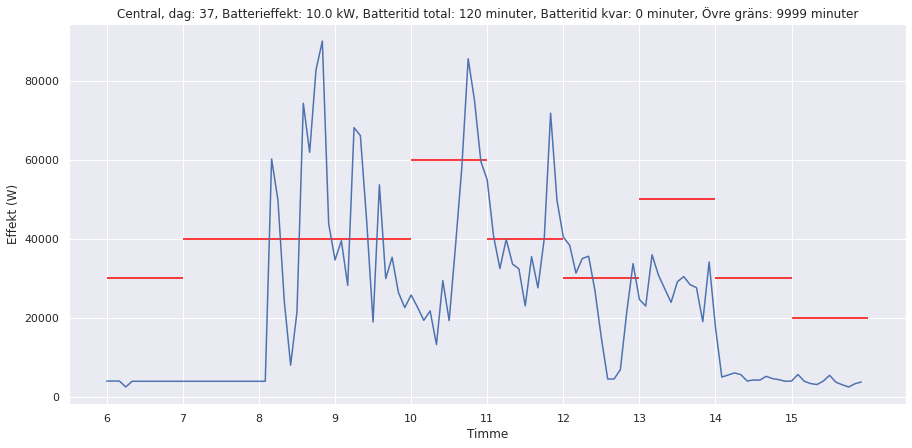

In [ ]:
simulate_battery('Central',37,120,9999,10000,20,10,1,all_files)

In [ ]:
modelD

In [ ]:
simulate_battery('Central',138,60,15,10000,20,1,all_files)

TypeError: ignored

Reducing for hour: 11
Reducing for hour: 12
Day #25 complete
Reducing for hour: 11
Reducing for hour: 12
Day #26 complete
Reducing for hour: 11
Day #27 complete
Reducing for hour: 11
Reducing for hour: 12
Day #28 complete
Reducing for hour: 11
Reducing for hour: 12
Day #29 complete
Reducing for hour: 11
Reducing for hour: 12
Day #30 complete
Reducing for hour: 11
Reducing for hour: 12
Day #31 complete
Reducing for hour: 11
Day #32 complete
Reducing for hour: 11
Reducing for hour: 12
Day #33 complete
Reducing for hour: 11
Reducing for hour: 12
Day #34 complete
Reducing for hour: 11
Reducing for hour: 12
Day #35 complete
Reducing for hour: 11
Reducing for hour: 12
Day #36 complete
Reducing for hour: 11
Reducing for hour: 12
Day #37 complete
Reducing for hour: 11
Day #38 complete
Reducing for hour: 11
Reducing for hour: 12
Day #39 complete
Reducing for hour: 11
Reducing for hour: 12
Day #40 complete
Reducing for hour: 11
Reducing for hour: 12
Day #41 complete
Reducing for hour: 11
Reducin

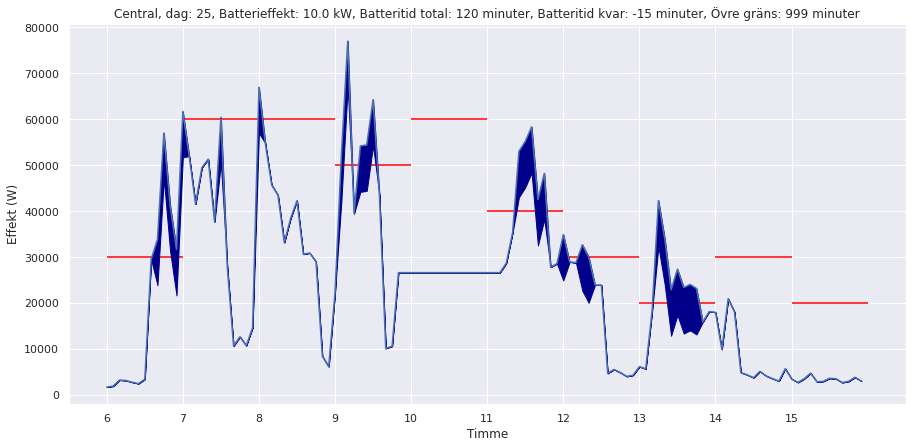

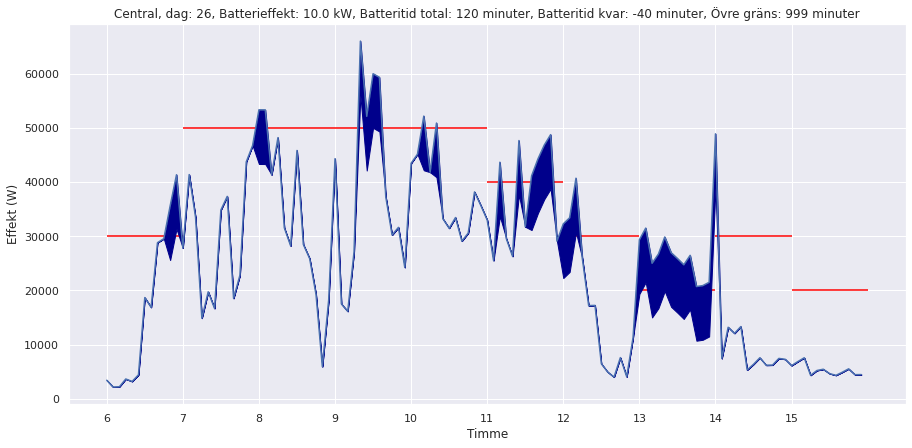

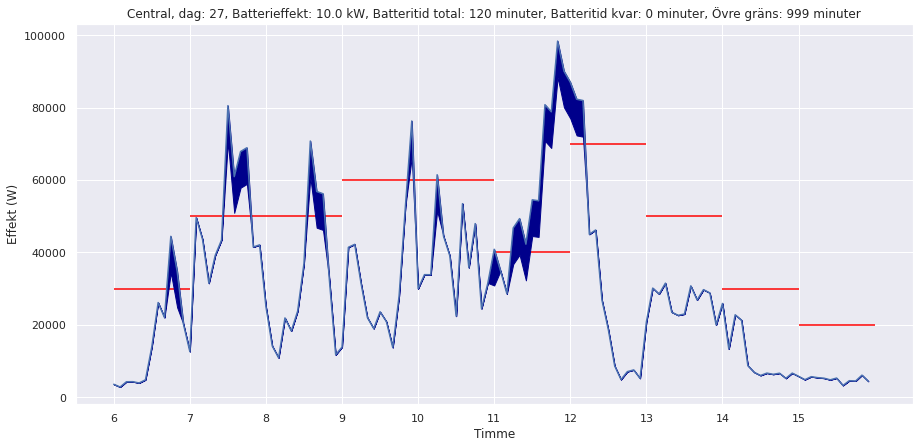

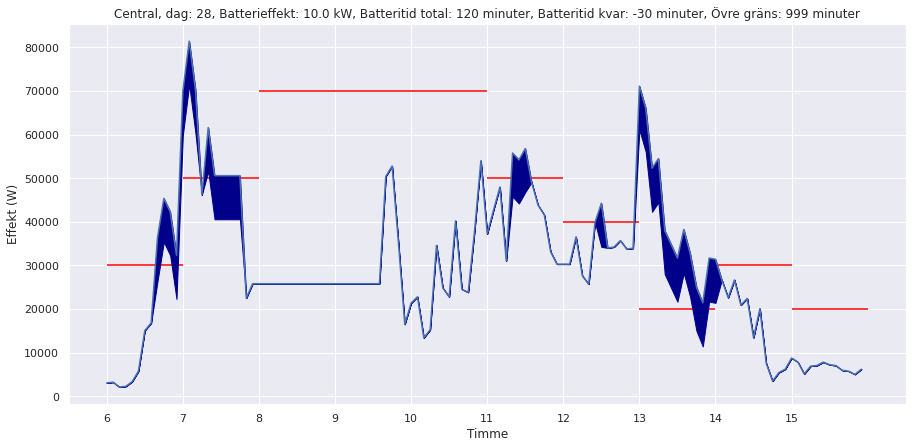

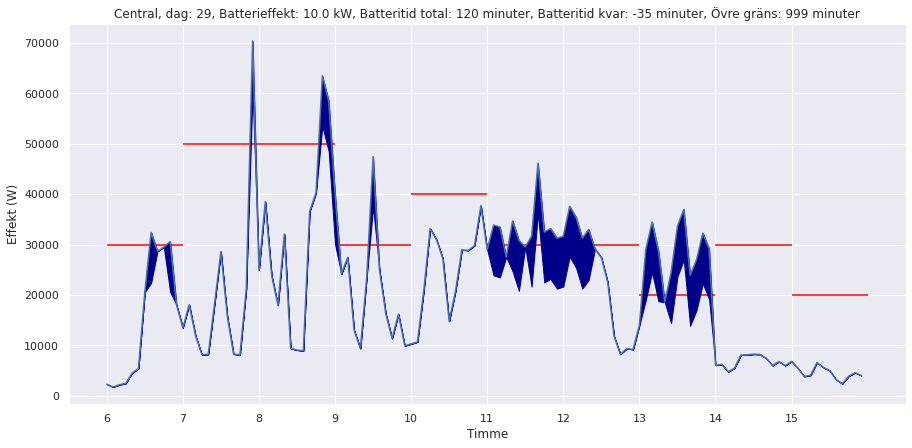

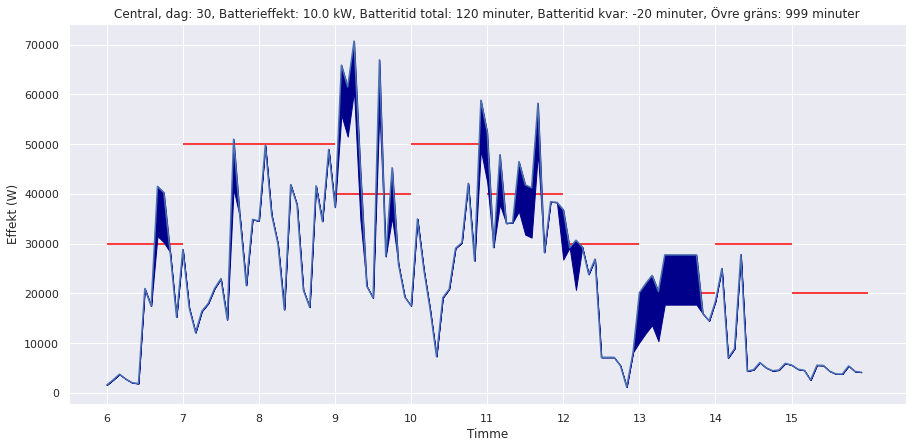

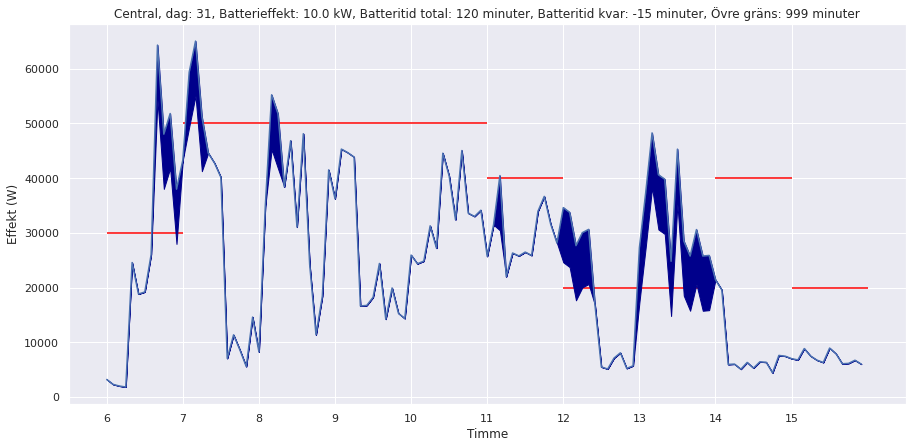

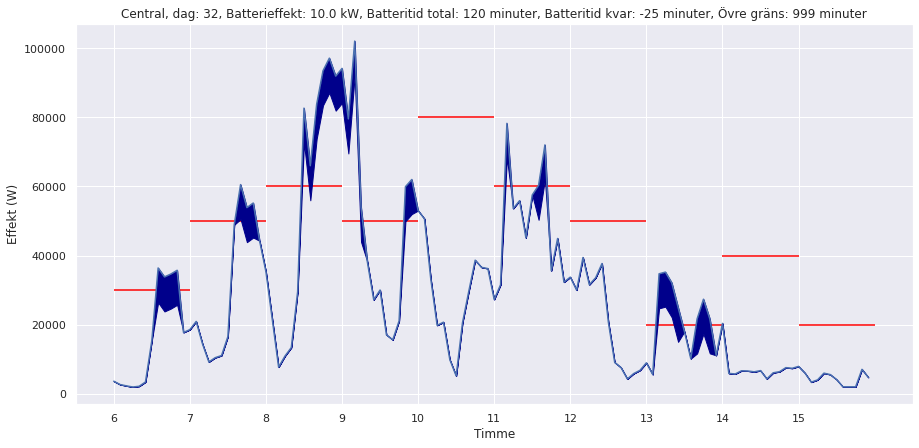

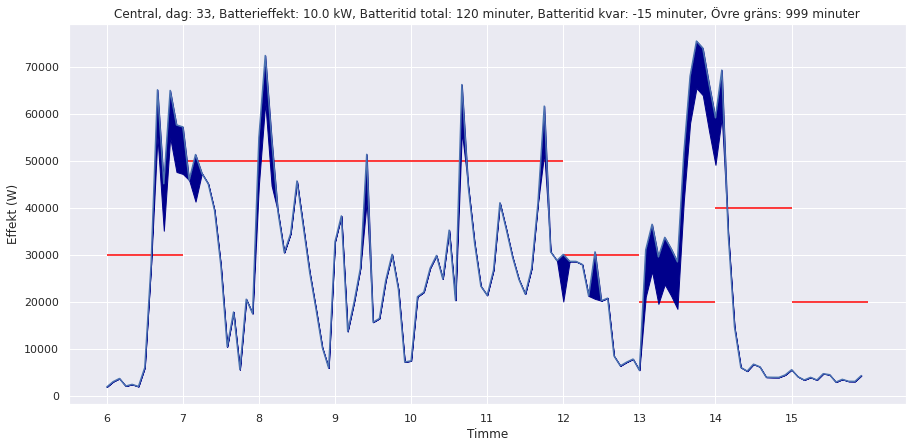

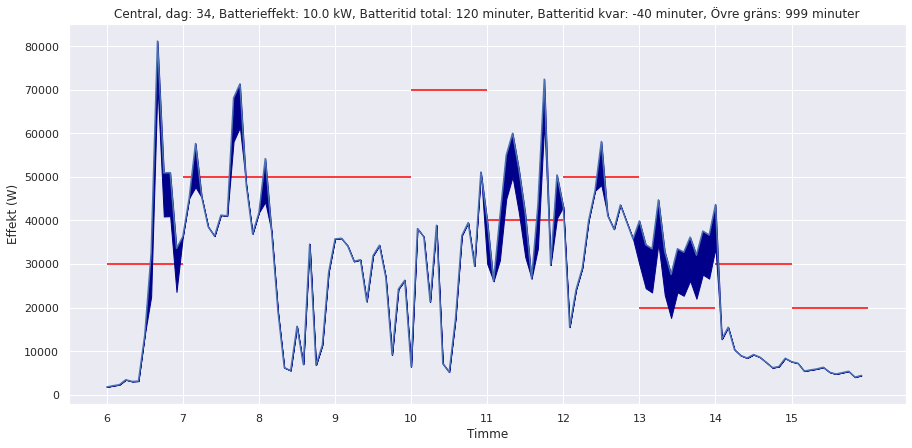

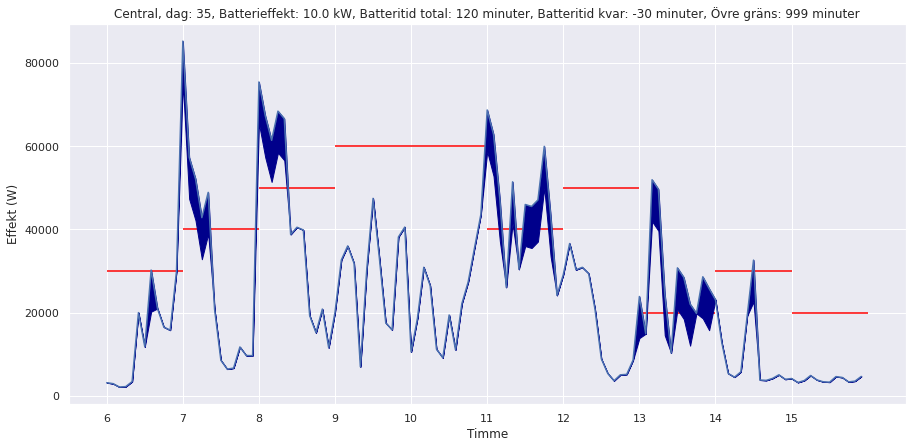

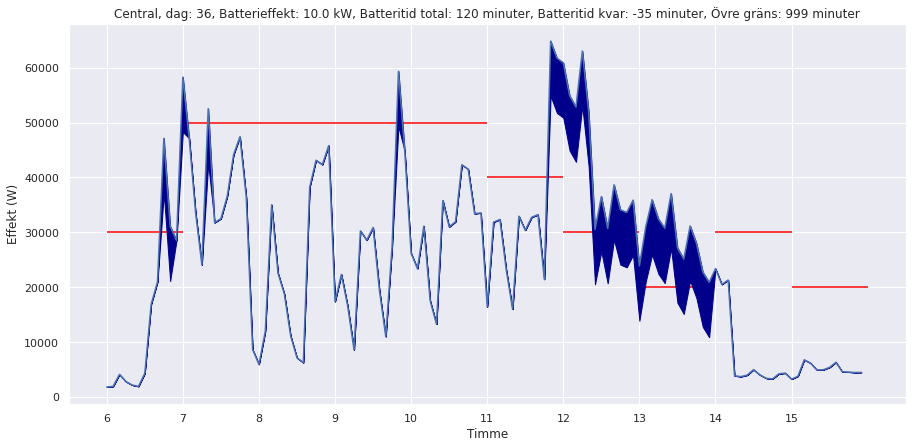

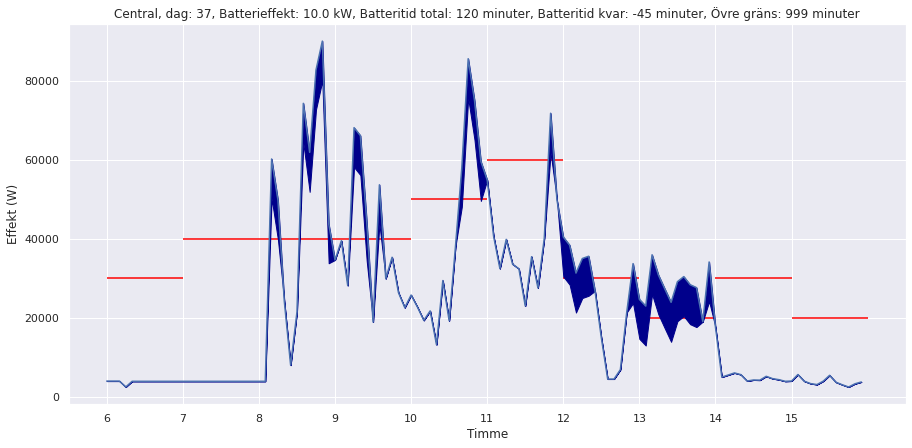

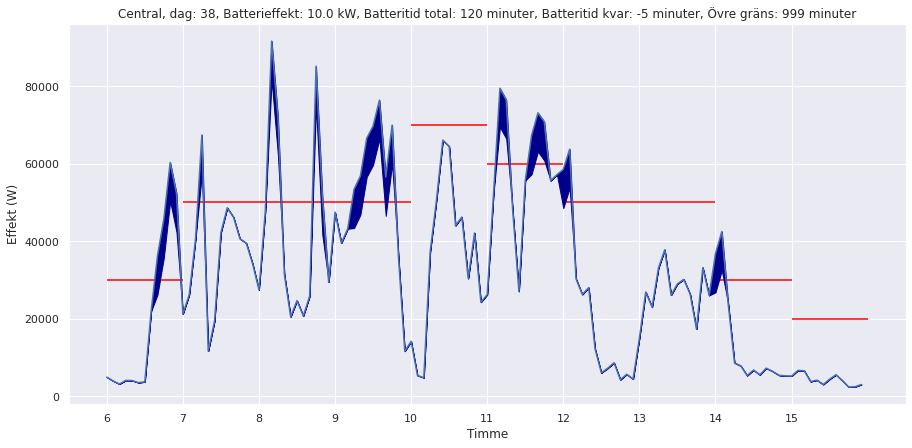

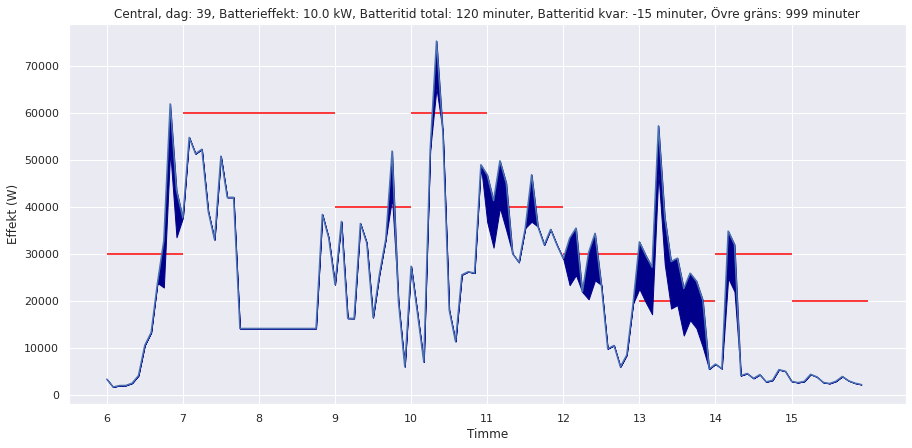

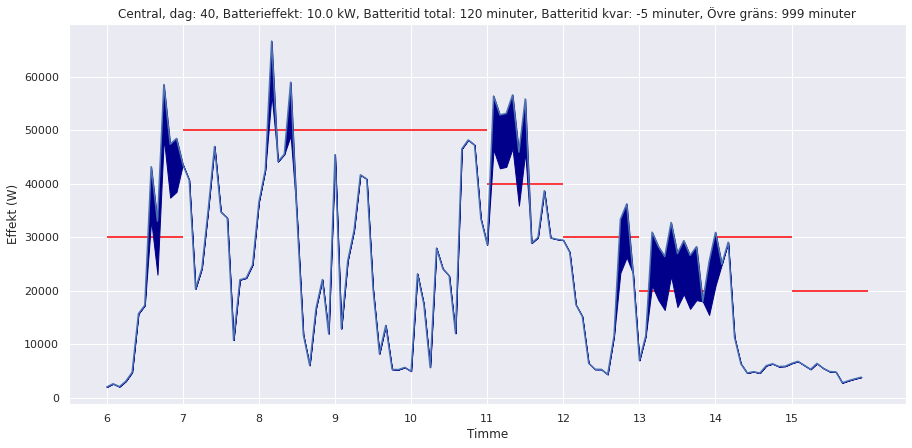

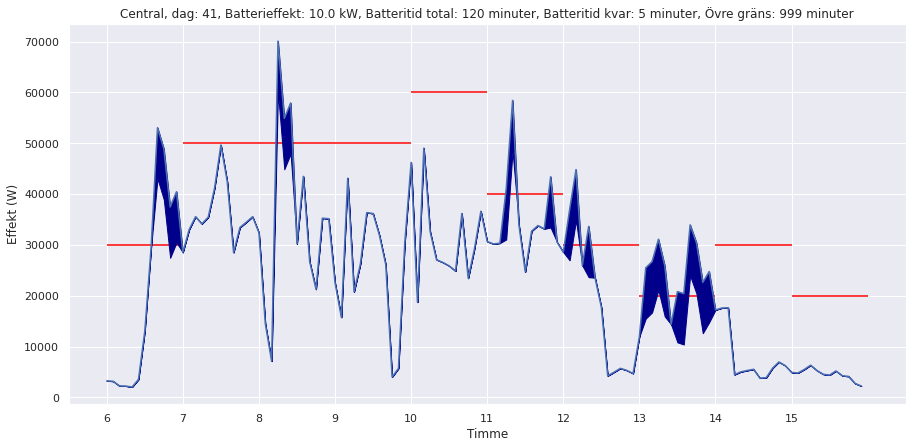

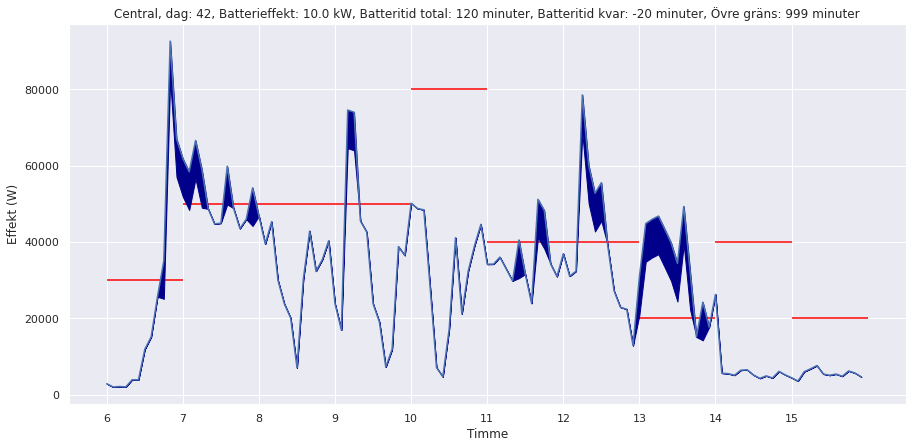

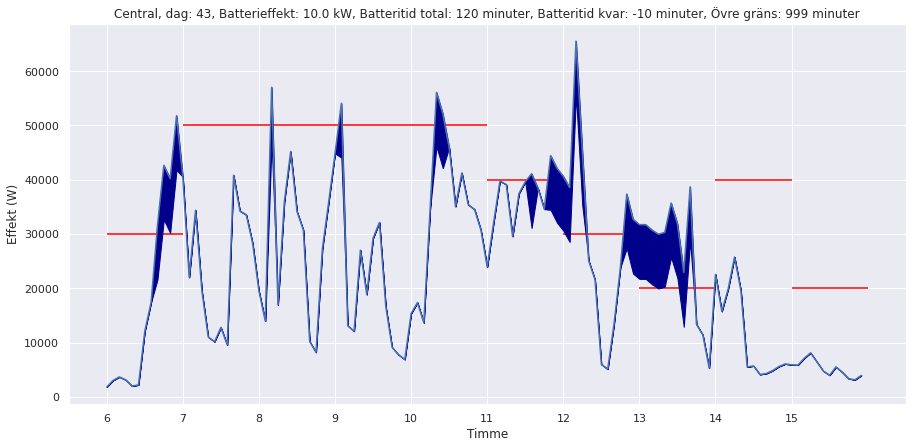

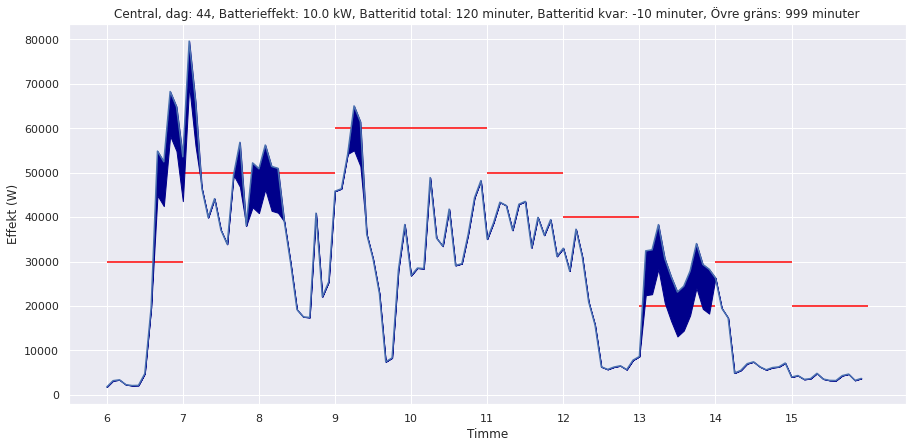

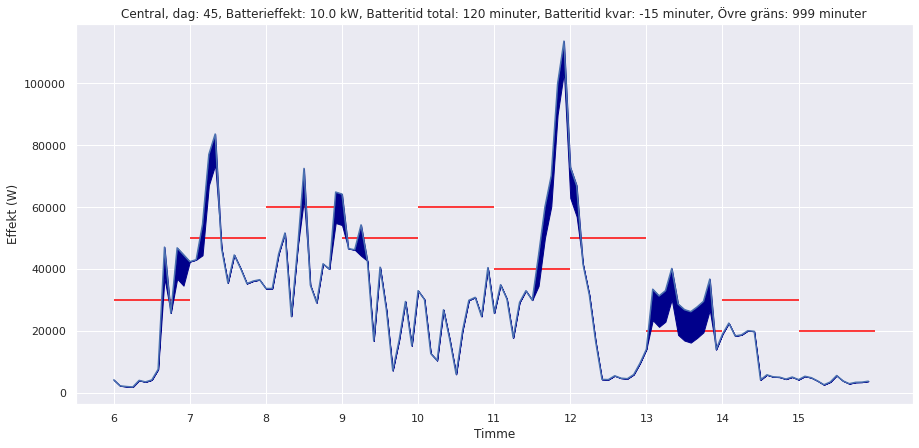

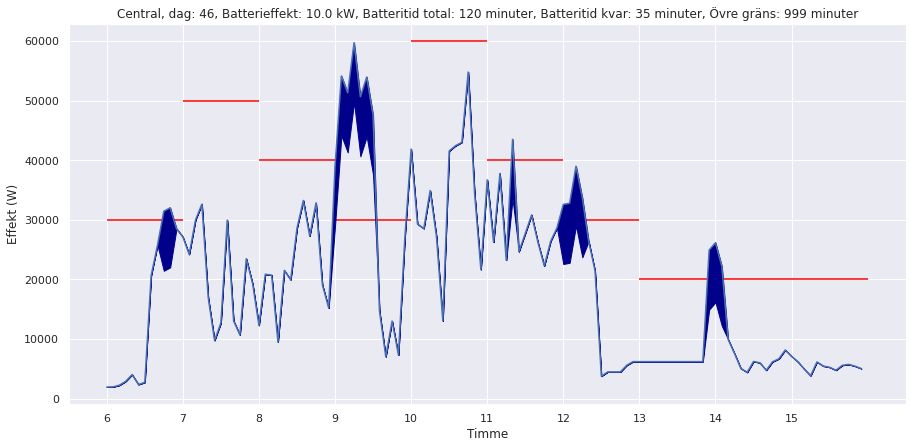

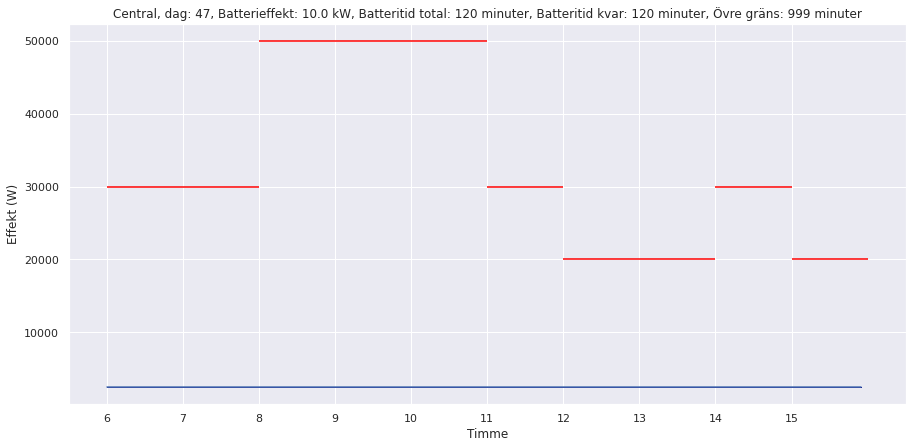

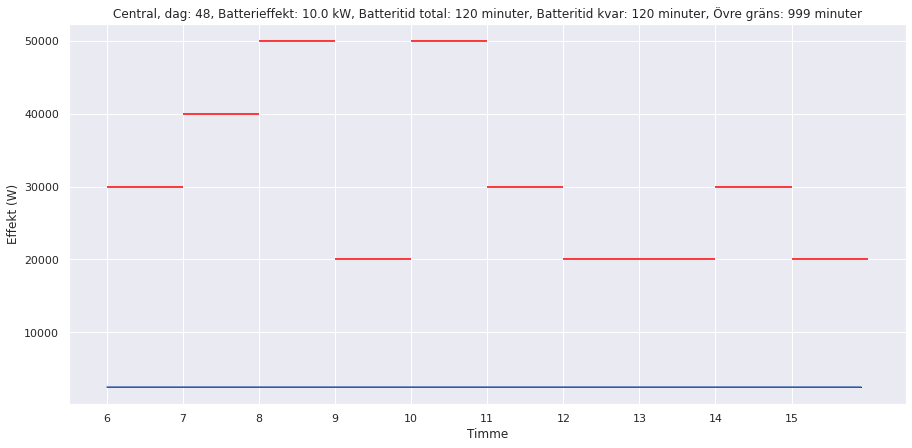

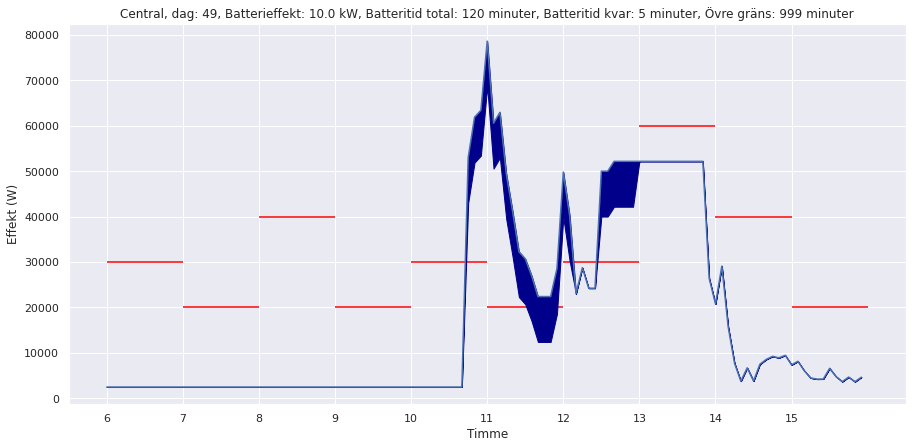

In [ ]:
time_left_list = []
for i in range(25,50):
  time_left_list.append(simulate_battery('Central',i,120,999,10000,20,10,1,all_files))

In [ ]:
all_files['Central']

In [ ]:
modelD

In [ ]:
checklist = list(modelD.keys())
testlist = [s for s in checklist if '15' in s]
for i in range(len(testlist)):
  modelD[testlist[i].replace('O', '')] = modelD.pop(testlist[i])

checklist = list(modelS.keys())
testlist = [s for s in checklist if '15' in s]
for i in range(len(testlist)):
  modelS[testlist[i].replace('O', '')] = modelS.pop(testlist[i])

checklist = list(modelÄ.keys())
testlist = [s for s in checklist if '15' in s]
for i in range(len(testlist)):
  modelÄ[testlist[i].replace('O', '')] = modelÄ.pop(testlist[i])

checklist = list(modelC.keys())
testlist = [s for s in checklist if '15' in s]
for i in range(len(testlist)):
  modelC[testlist[i].replace('O', '')] = modelC.pop(testlist[i])

In [ ]:
modelD

Text(0.5, 1.0, 'Mean = 31, Std = 29.359836511806396')

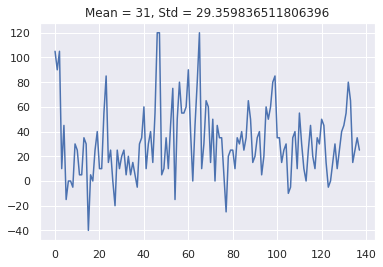

In [ ]:

plt.plot(time_left_list)
plt.title('Mean = ' + str(st.mean(time_left_list)) + ', Std = ' + str(st.pstdev(time_left_list)))

In [ ]:
simulate_battery('Central',138,60,15,10000,20,1,all_files)

12.767145334803704

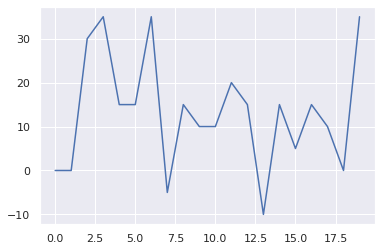

In [ ]:
plt.plot(time_left_list)
plt.title('Mean = ' + str(st.mean(time_left_list) + ', Std = ' + str(st.pstdev(time_left_list))))
st.mean(time_left_list)
st.pstdev(time_left_list)

NameError: ignored

In [ ]:
simulate_battery()

In [ ]:
df_min[(df_min['Stenhagen'] == 1) & (df_min['Month'] == i) & (df_min['Day'] == j)]['Power']

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]

In [ ]:
df[df['Stenhagen'] == 1].iloc[108]

Unnamed: 0           482
Date          2022-03-10
Month                  3
Day                   10
Central                0
                 ...    
U10I100K+            0.0
U11I100K+            0.0
U12I100K+            0.0
U13I100K+            0.0
U14I100K+            0.0
Name: 482, Length: 688, dtype: object

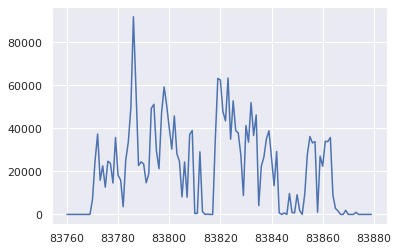

In [ ]:
plt.plot(df_min[(df_min['Stenhagen'] == 1) & (df_min['Month'] == 3) & (df_min['Day'] == 10)]['Power'])

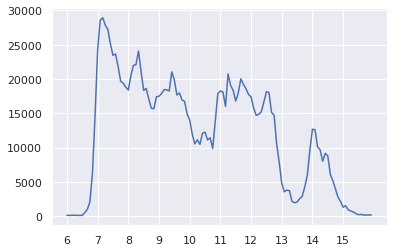

In [ ]:
hours = list(range(6,16))
minutes = list(range(0,56,5))
mean_list = []
for i in hours:
  for j in minutes:
    mean_power = df_min[(df_min['Stenhagen'] == 1) & (df_min['Hour'] == i) & (df_min['Minute'] == j)]['Power'].mean()
    mean_list.append(mean_power)

x = np.arange(0,120,1)
positions = range(0,120,12)
labels = list(range(6,16))
plt.xticks(positions, labels)
plt.plot(mean_list)


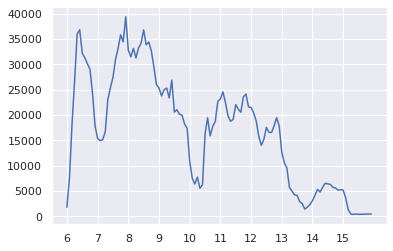

In [ ]:
hours = list(range(6,16))
minutes = list(range(0,56,5))
mean_list = []
for i in hours:
  for j in minutes:
    mean_power = df_min[(df_min['Domar'] == 1) & (df_min['Hour'] == i) & (df_min['Minute'] == j)]['Power'].mean()
    mean_list.append(mean_power)

x = np.arange(0,120,1)
positions = range(0,120,12)
labels = list(range(6,16))
plt.xticks(positions, labels)
plt.plot(mean_list)


In [ ]:
all_files = {}
all_files['Stenhagen'] = modelS
all_files['Central'] = modelC
all_files['Ärentuna'] = modelÄ
all_files['Domar'] = modelD

In [ ]:
all_files['Stenhagen']['TO15I20K+']


RandomForestRegressor(min_samples_leaf=5, min_samples_split=6)

In [ ]:
for i in list(modelD.keys()):
  if 'O15' in i:
    modelD['T15I' + i.split(sep='I')[1]] = modelD.pop(i)